In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import nltk
nltk.download('all')
!pip install pyLDAvis

In [0]:
import pandas as pd
import numpy as np
import string
import re
from pprint import pprint
# NLTK 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english') #this depends on each language
# Gensim
!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/all_data.csv')
a = df[['product_id','product_name','pre_define_cat']]

In [0]:
a

,product_id,product_name,pre_define_cat
0,Model: M92P,Refurbished Lenovo THINKCENTRE M92P-SFF Deskto...,desktop
1,Model: 790,Refurbished Dell Optiplex 790-SFF WA1-0309 Des...,desktop
2,Model: 8200 Elite,HP 8200 Elite Desktop Computer with Windows 10...,desktop
3,Model: ME086LL/A,"Apple iMac 21.5"" 2.7GHz Core i5 (ME086LL/A) Al...",desktop
4,Model: K_00180,Refurbished - Dell Optiplex Desktop Computer 3...,desktop
...,...,...,...
13886,NaN,"VIZIO SmartCast E-Series E55u-D2 55"" 4K Ultra ...",tv
13887,NaN,"Samsung UN75RU8000 75"" RU8000 LED Smart 4K UHD...",tv
13888,Walmart # 572101210,DummyStressTest1294Automation generated BV title,tv
13889,NaN,LED TV USB Backlight Kit Computer RGB LED Ligh...,tv


**tf-idf Embeddings**

In [0]:
#count vectorizer 
a.dropna(subset=['product_name'],inplace=True)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_final = vectorizer.fit_transform(a['product_name'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
corp = pd.DataFrame()
corp['collected'] = list(tfidf_final.toarray())
fin_l=[]
for i in corp['collected']:
  fin_l.append(list(i))

df1 = pd.DataFrame(fin_l)


In [0]:
df1.shape
#df1.to_csv('tf-idfValues')

(12896, 14463)

In [0]:
b = vectorizer.vocabulary_
len(b.keys())
df1.columns = b.keys()
df1['product_name'] = a['product_name']

In [0]:
df1

In [0]:
df1= df1.loc[:, df1.columns != 'Unnamed: 0']
df1

In [0]:
#df.dropna(subset=['product_name'],inplace=True)
product_name = df1['product_name']
product_name_ls = product_name.tolist()

In [0]:
df1['type']= a['pre_define_cat']
df_desktop = df1[df1['type']== 'desktop']
df_desktop_1 = df_desktop.loc[:,df_desktop.columns != 'type']

In [0]:
df_desktop_1.shape

(993, 14463)

In [0]:
df_desktop

**PCA**

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  
sc = StandardScaler() 

def PCArun(df,testdata,x):
  # Creating train and test set
  #X_train, X_test, y_train, y_test = train_test_split(df, testdata, test_size = 0.0, random_state = 0) 
  X_train = df
  #Fitting model  
  X_train = sc.fit_transform(X_train) 
  #X_test = sc.transform(X_test) 

  # Applying PCA function on training for 80% variance 
  pca = PCA(x) 
  
  X_train = pca.fit_transform(X_train) 
  #X_test = pca.transform(X_test)  
  explained_variance = pca.explained_variance_ratio_ 
  #return X_train, X_test,y_train,y_test,explained_variance
  return X_train,explained_variance


In [0]:
X_train, explained_variance = PCArun(df_desktop_1.loc[:,df_desktop_1.columns != 'product_name'],df_desktop['type'],0.7)
X_train.shape

(993, 184)

In [0]:
X_train = pd.DataFrame(X_train)
#X_train['product_name']= df_desktop_1['product_name']

In [0]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183
0,-3.824716,0.829441,0.014317,-0.634244,0.058156,1.369736,3.017929,0.104815,0.292967,-1.094393,0.109957,0.796393,0.010471,0.075416,0.173319,0.202302,0.142424,0.228536,0.138578,-0.278154,0.381627,0.884051,0.387863,-0.109868,0.095847,0.005732,0.280510,0.052115,0.207533,-0.689664,-0.121108,0.221449,-0.285327,-0.446069,-0.049406,0.103325,0.025365,-0.723286,0.170444,0.251863,...,0.582820,-1.226104,-1.810270,-0.436500,-1.038547,-0.906230,-1.257807,-0.872283,-0.969269,-2.678407,-1.630759,1.547502,-0.544668,1.254768,-0.287950,0.171805,-1.517195,-0.216674,-0.589037,0.375483,-0.387837,0.115370,0.490421,-0.653073,0.145084,-0.970827,0.526578,0.449443,-0.572763,0.866260,0.038119,0.719933,1.039973,-1.238742,0.570357,0.003402,-0.126933,-1.501078,-0.951082,-0.207751
1,-4.198198,0.918301,-0.019237,-0.850307,-0.017419,1.728393,3.267007,0.151428,0.212542,-1.210797,-0.143166,0.994389,0.335297,0.057848,0.411615,0.200280,0.131319,0.052286,0.393028,-0.481429,0.267889,0.049261,0.248662,-0.094076,-0.155533,0.288558,-0.338776,0.239198,0.560279,-0.029410,-0.454439,0.023187,-0.159089,-0.275215,-0.252223,-0.033832,0.072514,-0.318881,-0.111903,0.232860,...,0.963944,0.636700,-1.022817,-0.029623,-0.401291,1.109077,0.717038,-0.186111,-0.213441,0.413392,-0.837071,-0.679431,-0.239436,-0.422090,0.973325,-0.286437,-0.219065,0.179731,-0.299844,-1.309056,-0.844683,0.348239,-0.151020,-1.282019,-0.945522,-0.902422,-0.036766,-0.086976,-0.377086,-0.580153,-0.736114,-0.747902,0.180105,-1.020328,-1.344773,0.019623,-0.078254,0.711664,0.525808,1.102525
2,-2.184585,0.341355,-0.041594,0.241443,-0.013354,-0.587774,-1.773044,-0.157322,-0.248651,0.768677,0.007291,0.130192,0.192823,-0.137433,0.026784,-0.096379,-0.243281,0.115578,-0.744526,0.737177,0.101403,1.437011,0.023432,-0.326320,-0.003768,-0.683204,1.420820,-0.729103,-1.726959,-0.400997,0.513920,-0.965309,0.920563,0.094147,0.998172,0.164845,-0.107536,0.445927,0.388481,-0.172884,...,-0.061313,-0.011851,0.650680,0.111501,0.225843,-0.152830,0.318267,-0.112916,0.099977,-0.653613,-0.662896,-0.594568,-0.253872,-1.349140,0.244271,-0.306564,0.966897,0.059738,-0.007397,-0.353403,-0.514290,1.005319,-0.817899,0.342681,0.273348,0.131356,-0.849788,0.352593,0.627983,-1.054044,-0.270289,-0.092437,0.473432,-0.407904,0.448318,0.491411,0.930233,0.185232,0.294808,-0.708420
3,2.635817,-0.981398,0.370123,6.784440,0.181884,-4.813700,2.947691,-0.389435,0.242841,-5.538081,-3.209181,2.592758,0.284612,0.311896,0.420853,0.656282,-0.370351,1.756653,-2.860135,0.890030,2.802849,-0.791816,-0.836160,-0.657462,-2.216287,-0.460788,-3.921019,0.249641,3.349779,-2.063104,-0.132549,-0.622220,2.097544,-1.764041,-0.839825,0.244358,0.879780,-1.410531,-2.268467,-0.274188,...,3.843225,1.624315,1.509320,3.066951,2.764993,0.641619,-1.072649,-0.745930,2.169132,1.255436,-2.029698,0.078133,1.480618,-0.238716,1.528099,0.066347,-0.030252,-0.186388,-1.821754,-5.011550,-0.143830,-2.170460,1.092624,2.862042,-2.553674,1.141579,0.235469,-1.507244,-0.459409,0.561246,0.285324,0.996807,0.339820,1.389395,0.148546,-2.107265,-0.219938,0.845273,-0.650840,-0.272261
4,-1.733550,0.415109,-0.172579,0.277972,-0.184180,-1.372129,-5.879970,-0.288093,-1.098812,2.457142,-0.578323,-0.409814,1.923327,-1.001748,1.680158,-0.954766,0.891705,-0.266091,1.744536,-1.749431,0.325685,-0.187219,0.547948,-0.190725,-0.707469,0.527981,-1.148914,0.660462,1.568562,-0.157220,-0.263499,0.097952,0.037387,0.133308,-0.418348,-0.047024,-0.094112,0.012253,-0.101362,-0.005775,...,0.024021,0.055324,0.139084,-0.249916,-0.101067,0.215186,0.070543,-0.171761,-0.258776,0.592288,0.021885,0.412252,0.903269,-0.668851,-0.242840,-0.285315,0.259919,-0.330658,-0.280258,0.163440,0.372250,-0.235420,0.121218,0.361510,-0.440356,-0.034571,-0.319481,0.447107,-0.41839

**K-MEANS**

In [0]:
#Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

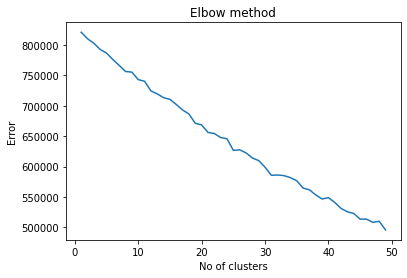

In [0]:
Error =[]
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i).fit(X_train)
    kmeans.fit(X_train)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 50), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

**20 number of clusters seems like a good option**

In [0]:
kmeans20 = KMeans(n_clusters=20)
y_kmeans20 = kmeans20.fit_predict(X_train)
print(y_kmeans20)
kmeans20.cluster_centers_

In [0]:
from sklearn import metrics
metrics.silhouette_score(X_train,y_kmeans20)

0.00751945691050922

In [0]:
after_kmeans = pd.DataFrame(X_train)
y_kmeans20.shape
after_kmeans.shape
after_kmeans['k_val']= y_kmeans20

In [0]:
after_kmeans['product_name'] = df_desktop_1['product_name']

**Sorting according to cluster value**

In [0]:
after_kmeans.sort_values(by=['k_val'],inplace=True)
set(y_kmeans20)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

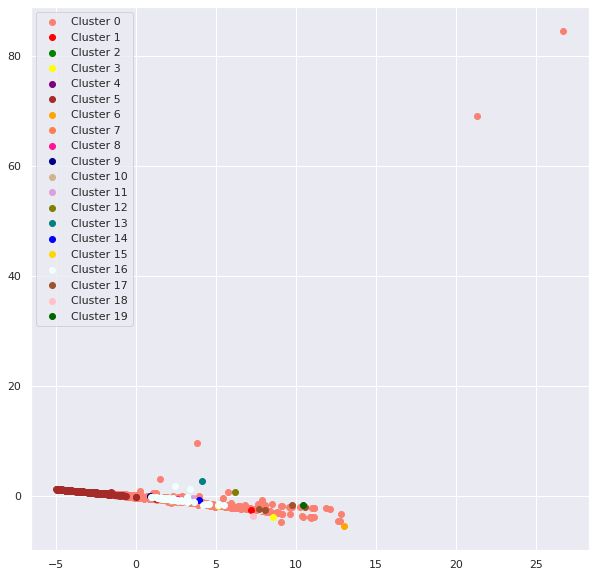

In [0]:
data = pd.DataFrame(X_train).iloc[:,0:2]
data['label']=y_kmeans20
data.columns= ['P1','P2','label']
import matplotlib
cmap={0:'salmon',1:'red',2:'green',3:'yellow',4:'purple',5:'brown',6:'orange',7:'coral',8:'deeppink',9:'darkblue',10:'tan',11:'plum',12:'olive',13:'teal',14:'blue',15:'gold',16:'azure',17:'sienna',18:'pink',19:'darkgreen'}

fig, ax = plt.subplots()
for l in range(len(data.loc[:,'label'].unique())):
  pca_temp = data[data['label']==l]
  ax.scatter(pca_temp['P1'], pca_temp['P2'], c=cmap[l], label= 'Cluster '+str(l))
ax.legend()
fig.set_size_inches(10,10)


**LDA**

In [0]:
def ldafunc(data):
  def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(data))

  #print(data_words[:1])
  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # See trigram example
  #print(trigram_mod[bigram_mod[data_words[0]]])
  # Define functions for stopwords, bigrams, trigrams and lemmatization
  def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

  def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

  def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out 
  #To run this code it is necessary to get the spacy moidel: "!python - m spacy download en", last depends on the used language 

  # Remove Stop Words
  data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words_nostops)

  # Initialize spacy 'es' model, keeping only tagger component (for efficiency)
  #python3 -m spacy download es
  nlp = spacy.load('en', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  #print(corpus[:1])
  # Human readable format of corpus (term-frequency)
  [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

  # Build LDA model
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=14,
                                           alpha='auto',
                                           per_word_topics=True)

  # Print the Keyword in the 2 topics
  #pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]

  # Compute Perplexity
  #print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  #print('\nCoherence Score: ', coherence_lda)

  # Visualize the topics
  pyLDAvis.enable_notebook()
  vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
  vis

  return lda_model.print_topics()

In [0]:
cluster_results = {}
for i in range(len(set(y_kmeans20))):
  print(i)
  x1 = after_kmeans['product_name'][after_kmeans['k_val']==i].tolist()
  ans = ldafunc(x1)
  num = 'cluster'+str(i)
  cluster_results[num] = ans

In [0]:
cluster_results

{'cluster0': [(0,
   '0.081*"home" + 0.060*"memory" + 0.056*"bit" + 0.053*"include" + 0.050*"pc" + 0.045*"window" + 0.045*"gaming" + 0.044*"computer" + 0.041*"desktop" + 0.039*"bluetooth"'),
  (1,
   '0.143*"core" + 0.104*"refurbish" + 0.095*"keyboard" + 0.095*"pc" + 0.072*"home" + 0.054*"monitor" + 0.036*"pro" + 0.035*"dual" + 0.034*"mouse" + 0.029*"lcd"')],
 'cluster1': [(0, '0.336*"read" + 0.336*"monitor" + 0.328*"complete"'),
  (1, '0.336*"complete" + 0.332*"monitor" + 0.332*"read"')],
 'cluster10': [(0,
   '0.125*"language" + 0.125*"gateway" + 0.125*"desktop" + 0.125*"year" + 0.125*"warranty" + 0.125*"refurbish" + 0.125*"multi" + 0.125*"bit"'),
  (1,
   '0.125*"bit" + 0.125*"multi" + 0.125*"refurbish" + 0.125*"warranty" + 0.125*"year" + 0.125*"desktop" + 0.125*"gateway" + 0.125*"language"')],
 'cluster11': [(0,
   '0.167*"window" + 0.167*"pc" + 0.167*"mini" + 0.167*"pro" + 0.167*"fanless" + 0.166*"cherry"'),
  (1,
   '0.169*"cherry" + 0.167*"fanless" + 0.167*"pro" + 0.166*"mini" +

**GMM Modeling**

In [0]:
import numpy as np
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

**Best number of cluster according to BIC**

Text(0.5, 0, 'n_components')

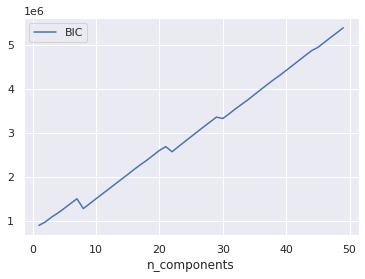

In [0]:
n_components = np.arange(1, 50)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train) for n in n_components]

# BIC Scores 
plt.plot(n_components, [m.bic(X_train) for m in models], label='BIC')
#plt.plot(n_components, [m.aic(X_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

**BIC Best number of clusters = 9**

**According to Silhouette Score**

In [0]:
sil_score = []
for i in range(2,50):
  gmm = GaussianMixture(n_components=i)
  gmm.fit(X_train)
  labels = gmm.predict(X_train)
  sil_score.append(metrics.silhouette_score(X_train,labels))

sil_score = pd.DataFrame(range(2,50,1),sil_score)


In [0]:
sil_score.sort_index(ascending=False)

,0
0.660699,4
0.657900,5
0.570366,8
0.370126,3
0.278535,2
0.182464,7
0.147238,11
0.055303,43
0.054370,41
0.050536,31


**Number of clusters here is 8**


**Comparable to Silhouette Score**

In [0]:
gmm = GaussianMixture(n_components=8)
gmm.fit(X_train)
labels = gmm.predict(X_train)
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [0]:
data = pd.DataFrame(X_train).iloc[:,0:2]
data['label']=labels
data.columns= ['P1','P2','label']

In [0]:
after_gmm = pd.DataFrame(a[a['pre_define_cat']== 'desktop'])
after_gmm['cluster'] = labels

In [0]:
cluster_gmm_results = {}
for i in range(len(set(labels))):
  print(i)
  x1 = after_kmeans['product_name'][after_gmm['cluster']==i].tolist()
  ans = ldafunc(x1)
  num = 'cluster'+str(i)
  cluster_gmm_results[num] = ans

0


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


1


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


2


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


3


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


4


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


5


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


6


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


7


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


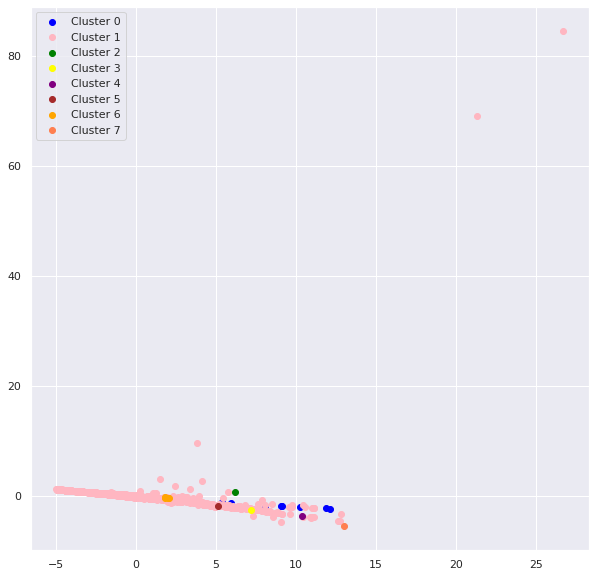

In [0]:
import matplotlib
cmap={0:'blue',1:'lightpink',2:'green',3:'yellow',4:'purple',5:'brown',6:'orange',7:'coral',8:'deeppink',9:'darkblue'}

fig, ax = plt.subplots()
for l in range(len(data.loc[:,'label'].unique())):
  pca_temp = data[data['label']==l]
  ax.scatter(pca_temp['P1'], pca_temp['P2'], c=cmap[l], label= 'Cluster '+str(l))
ax.legend()
fig.set_size_inches(10,10)


In [0]:
cluster_gmm_results

{'cluster0': [(0,
   '0.126*"home" + 0.126*"core" + 0.125*"window" + 0.125*"factor" + 0.125*"desktop" + 0.124*"small" + 0.124*"gb" + 0.124*"form"'),
  (1,
   '0.235*"core" + 0.167*"home" + 0.100*"form" + 0.100*"gb" + 0.100*"small" + 0.100*"desktop" + 0.100*"factor" + 0.099*"window"')],
 'cluster1': [(0,
   '0.113*"core" + 0.110*"refurbish" + 0.092*"keyboard" + 0.088*"monitor" + 0.059*"window" + 0.048*"include" + 0.043*"pro" + 0.042*"pc" + 0.035*"memory" + 0.033*"dual"'),
  (1,
   '0.141*"pc" + 0.116*"home" + 0.057*"desktop" + 0.049*"computer" + 0.045*"refurbish" + 0.042*"core" + 0.035*"wifi" + 0.031*"gaming" + 0.030*"usb" + 0.026*"memory"')],
 'cluster2': [(0, '0.336*"memory" + 0.336*"graphic" + 0.328*"flash"'),
  (1, '0.336*"flash" + 0.332*"graphic" + 0.332*"memory"')],
 'cluster3': [(0,
   '0.114*"pc" + 0.114*"pavilion" + 0.114*"privacy" + 0.114*"fhd" + 0.114*"keyboard" + 0.068*"wireless" + 0.068*"optane" + 0.068*"core" + 0.068*"memory" + 0.023*"intel"'),
  (1,
   '0.120*"memory" + 0